In [19]:
#Importation des bibliothèques nécessaires
import pandas as pd

df1 = pd.read_excel('QVI_transaction_data.xlsx')
df2 = pd.read_csv('QVI_purchase_behaviour.csv')

df = pd.merge(df1, df2, left_on='LYLTY_CARD_NBR', right_on='LYLTY_CARD_NBR', suffixes=('_trans', '_behav'))

# Affiche les 5 premières lignes du dataset
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [59]:
# Affichage des informations du DataFrame fusionné
df.info()
df.shape
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236004 entries, 0 to 236003
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              236004 non-null  datetime64[ns]
 1   STORE_NBR         236004 non-null  int64         
 2   LYLTY_CARD_NBR    236004 non-null  int64         
 3   TXN_ID            236004 non-null  int64         
 4   PROD_NBR          236004 non-null  int64         
 5   PROD_NAME         236004 non-null  object        
 6   PROD_QTY          236004 non-null  int64         
 7   TOT_SALES         236004 non-null  float64       
 8   LIFESTAGE         236004 non-null  object        
 9   PREMIUM_CUSTOMER  236004 non-null  object        
 10  PACK_SIZE         236004 non-null  float64       
 11  BRAND             236004 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 21.6+ MB


C:\Users\yohar\AppData\Local\Temp\ipykernel_39668\3968673605.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND
count,236004,236004.000000,236004.000000,236004.000000,236004.000000,236004,236004.0,236004.000000,236004,236004,236004.000000,236004
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN,7,3,NaN,29
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,OLDER SINGLES/COUPLES,Mainstream,NaN,Kettle
freq,879,NaN,NaN,NaN,NaN,3002,NaN,NaN,48965,90550,NaN,37190
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.217895,135383.258275,135288.460590,56.555274,NaN,2.0,7.675614,NaN,NaN,182.452348,NaN
std,NaN,76.241298,76240.110219,77490.662184,32.821081,NaN,0.0,2.215803,NaN,NaN,64.436088,NaN
min,NaN,1.000000,1000.000000,1.000000,1.000000,NaN,2.0,2.700000,NaN,NaN,70.000000,NaN
25%,NaN,70.000000,70090.000000,68010.750000,28.000000,NaN,2.0,6.000000,NaN,NaN,150.000000,NaN


In [46]:
# Gestion des valeurs manquantes

# Afficher le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

# Exemple de traitement : suppression ou imputation
# Ici, on choisit d'imputer les valeurs manquantes numériques par la médiane et les catégorielles par le mode

for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['float64', 'int64']:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
        else:
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)

# Vérification après traitement
print(df.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PACK_SIZE           0
BRAND               0
dtype: int64
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PACK_SIZE           0
BRAND               0
dtype: int64


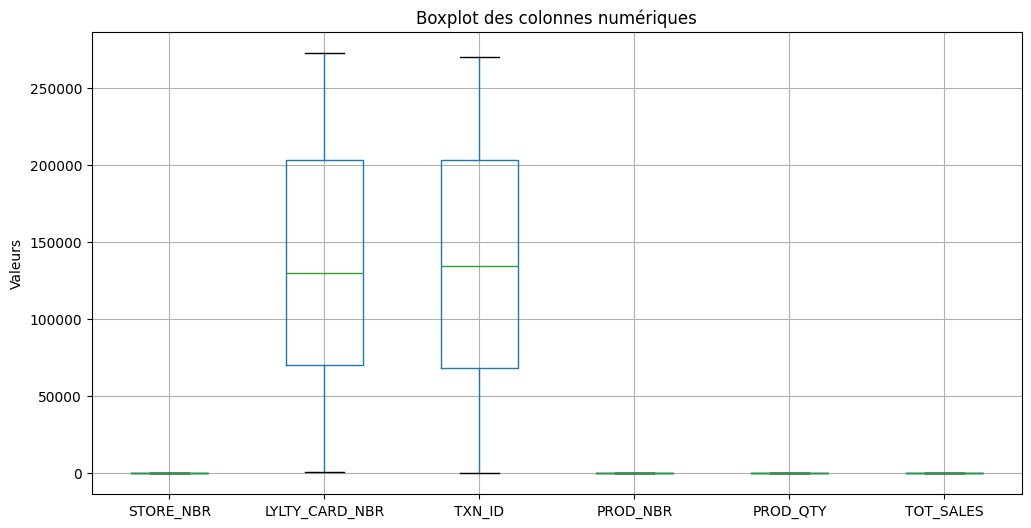

In [29]:
import matplotlib.pyplot as plt

# Afficher un boxplot pour chaque colonne numérique du DataFrame df
df[numeric_cols].boxplot(figsize=(12, 6))
plt.title("Boxplot des colonnes numériques")
plt.ylabel("Valeurs")
plt.show()

In [31]:
# Suppression des outliers pour toutes les colonnes numériques compatibles
df_no_outliers = df.copy()
for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

df_no_outliers.reset_index(drop=True, inplace=True)
df = df_no_outliers

In [33]:
# Vérification et correction des formats de données pour les colonnes importantes

# Vérifier le type de la colonne 'DATE'
if not pd.api.types.is_datetime64_any_dtype(df['DATE']):
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Vérifier les types numériques
numeric_columns = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE']
for col in numeric_columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérifier les types de colonnes catégorielles
categorical_columns = ['PROD_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND']
for col in categorical_columns:
    if not pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].astype(str)

# Afficher les types de données après correction
print(df.dtypes)

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
PACK_SIZE                  float64
BRAND                       object
dtype: object


In [34]:
import re

# Création de nouvelles features à partir des données existantes

# Extraire la taille du paquet (pack size) à partir du nom du produit si ce n'est pas déjà fait

def extract_pack_size(prod_name):
    match = re.search(r'(\d+)(g|G)', prod_name)
    if match:
        return float(match.group(1))
    return None

if 'PACK_SIZE' not in df.columns or df['PACK_SIZE'].isnull().any():
    df['PACK_SIZE'] = df['PROD_NAME'].apply(extract_pack_size)

# Extraire le nom de la marque à partir du nom du produit si ce n'est pas déjà fait
def extract_brand(prod_name):
    return prod_name.split()[0] if isinstance(prod_name, str) else None

if 'BRAND' not in df.columns or df['BRAND'].isnull().any():
    df['BRAND'] = df['PROD_NAME'].apply(extract_brand)

# Afficher les premières lignes pour vérifier
df[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head()

,PROD_NAME,PACK_SIZE,BRAND
0,Natural Chip Compny SeaSalt175g,175.0,Natural
1,WW Original Stacked Chips 160g,160.0,WW
2,Smiths Crinkle Cut Chips Chicken 170g,170.0,Smiths
3,Tyrrells Crisps Lightly Salted 165g,165.0,Tyrrells
4,Kettle Tortilla ChpsFeta&Garlic 150g,150.0,Kettle


# 1. Dépense totale par client
Calcul de la dépense totale pour chaque client (`LYLTY_CARD_NBR`).

In [35]:
depense_totale_client = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
depense_totale_client.rename(columns={'TOT_SALES': 'DEPENSE_TOTALE'}, inplace=True)
depense_totale_client.head()

,LYLTY_CARD_NBR,DEPENSE_TOTALE
0,1000,6.0
1,1010,8.8
2,1011,6.2
3,1013,4.2
4,1025,6.0


# 2. Nombre total de transactions par client
Nombre de transactions réalisées par chaque client.

In [36]:
transactions_par_client = df.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().reset_index()
transactions_par_client.rename(columns={'TXN_ID': 'NB_TRANSACTIONS'}, inplace=True)
transactions_par_client.head()

,LYLTY_CARD_NBR,NB_TRANSACTIONS
0,1000,1
1,1010,1
2,1011,1
3,1013,1
4,1025,1


# 3. Dépense moyenne par transaction
Calcul de la dépense moyenne par transaction pour chaque client.

In [37]:
depense_moyenne_transaction = depense_totale_client.merge(transactions_par_client, on='LYLTY_CARD_NBR')
depense_moyenne_transaction['DEPENSE_MOYENNE_PAR_TRANSACTION'] = depense_moyenne_transaction['DEPENSE_TOTALE'] / depense_moyenne_transaction['NB_TRANSACTIONS']
depense_moyenne_transaction[['LYLTY_CARD_NBR', 'DEPENSE_MOYENNE_PAR_TRANSACTION']].head()

,LYLTY_CARD_NBR,DEPENSE_MOYENNE_PAR_TRANSACTION
0,1000,6.0
1,1010,8.8
2,1011,6.2
3,1013,4.2
4,1025,6.0


# 4. Quantité totale achetée par client
Somme des quantités achetées par chaque client.

In [38]:
quantite_totale_client = df.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum().reset_index()
quantite_totale_client.rename(columns={'PROD_QTY': 'QTE_TOTALE'}, inplace=True)
quantite_totale_client.head()

,LYLTY_CARD_NBR,QTE_TOTALE
0,1000,2
1,1010,2
2,1011,2
3,1013,2
4,1025,2


# 5. Taille moyenne des paquets achetés
Taille moyenne des paquets achetés par client.

In [39]:
taille_moyenne_paquet = df.groupby('LYLTY_CARD_NBR')['PACK_SIZE'].mean().reset_index()
taille_moyenne_paquet.rename(columns={'PACK_SIZE': 'TAILLE_MOYENNE_PAQUET'}, inplace=True)
taille_moyenne_paquet.head()

,LYLTY_CARD_NBR,TAILLE_MOYENNE_PAQUET
0,1000,175.0
1,1010,170.0
2,1011,180.0
3,1013,175.0
4,1025,175.0


# 6. Marque préférée par client
Marque la plus achetée par chaque client.

In [40]:
marque_preferee = df.groupby(['LYLTY_CARD_NBR', 'BRAND'])['PROD_QTY'].sum().reset_index()
marque_preferee = marque_preferee.loc[marque_preferee.groupby('LYLTY_CARD_NBR')['PROD_QTY'].idxmax()]
marque_preferee = marque_preferee[['LYLTY_CARD_NBR', 'BRAND']]
marque_preferee.head()

,LYLTY_CARD_NBR,BRAND
0,1000,Natural
1,1010,Doritos
2,1011,GrnWves
3,1013,CCs
4,1025,Smiths


# 7. Fréquence d'achat (nombre moyen de jours entre les achats)
Calcul du nombre moyen de jours entre les achats pour chaque client.

In [41]:
df_sorted = df.sort_values(['LYLTY_CARD_NBR', 'DATE'])
frequence_achat = df_sorted.groupby('LYLTY_CARD_NBR')['DATE'].apply(lambda x: x.diff().dt.days.mean()).reset_index()
frequence_achat.rename(columns={'DATE': 'FREQUENCE_ACHAT_JOURS'}, inplace=True)
frequence_achat.head()

,LYLTY_CARD_NBR,FREQUENCE_ACHAT_JOURS
0,1000,NaN
1,1010,NaN
2,1011,NaN
3,1013,NaN
4,1025,NaN


# 8. Dépense totale par segment (LIFESTAGE, PREMIUM_CUSTOMER)
Somme des dépenses pour chaque segment.

In [42]:
depense_par_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
depense_par_segment.rename(columns={'TOT_SALES': 'DEPENSE_TOTALE'}, inplace=True)
depense_par_segment.head()

,LIFESTAGE,PREMIUM_CUSTOMER,DEPENSE_TOTALE
0,MIDAGE SINGLES/COUPLES,Budget,33073.9
1,MIDAGE SINGLES/COUPLES,Mainstream,85259.3
2,MIDAGE SINGLES/COUPLES,Premium,54343.6
3,NEW FAMILIES,Budget,20113.4
4,NEW FAMILIES,Mainstream,15660.7


# 9. Dépense moyenne par segment
Dépense moyenne par transaction pour chaque segment.

In [43]:
depense_moyenne_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
depense_moyenne_segment.rename(columns={'TOT_SALES': 'DEPENSE_MOYENNE'}, inplace=True)
depense_moyenne_segment.head()

,LIFESTAGE,PREMIUM_CUSTOMER,DEPENSE_MOYENNE
0,MIDAGE SINGLES/COUPLES,Budget,7.515087
1,MIDAGE SINGLES/COUPLES,Mainstream,7.998058
2,MIDAGE SINGLES/COUPLES,Premium,7.555067
3,NEW FAMILIES,Budget,7.915545
4,NEW FAMILIES,Mainstream,7.933485


# 10. Produit le plus acheté par segment
Produit le plus acheté (en quantité) pour chaque segment.

In [44]:
produit_plus_achete = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_NAME'])['PROD_QTY'].sum().reset_index()
idx = produit_plus_achete.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].idxmax()
produit_plus_achete = produit_plus_achete.loc[idx][['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_NAME', 'PROD_QTY']]
produit_plus_achete.head()

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,PROD_QTY
29,MIDAGE SINGLES/COUPLES,Budget,Infzns Crn Crnchers Tangy Gcamole 110g,136
191,MIDAGE SINGLES/COUPLES,Mainstream,Smiths Crinkle Chips Salt & Vinegar 330g,350
280,MIDAGE SINGLES/COUPLES,Premium,Pringles Chicken Salt Crips 134g,210
352,NEW FAMILIES,Budget,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,86
470,NEW FAMILIES,Mainstream,Doritos Corn Chip Southern Chicken 150g,70


        DATE  NB_TRANSACTIONS
0 2018-07-01              666
1 2018-07-02              652
2 2018-07-03              662
3 2018-07-04              653
4 2018-07-05              642


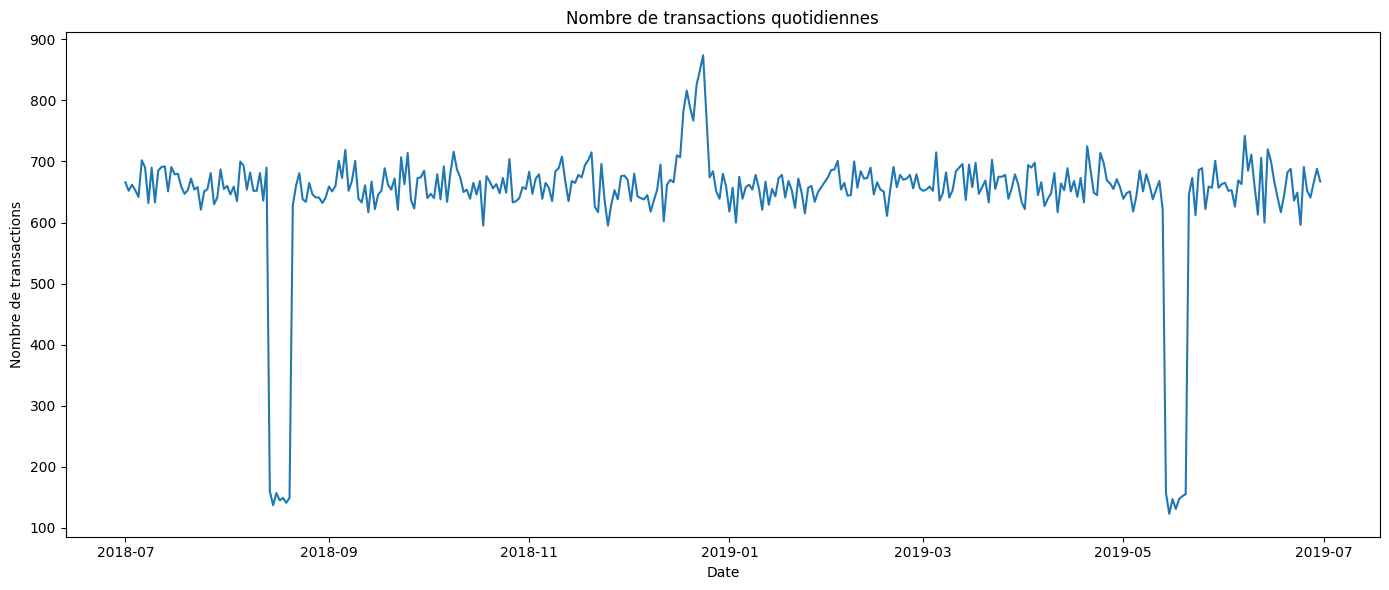

In [45]:
# Analyse du nombre de transactions par jour

transactions_quotidiennes = df.groupby('DATE')['TXN_ID'].nunique().reset_index()
transactions_quotidiennes.rename(columns={'TXN_ID': 'NB_TRANSACTIONS'}, inplace=True)

# Affichage des premières lignes
print(transactions_quotidiennes.head())

# Visualisation de l'évolution des transactions quotidiennes
plt.figure(figsize=(14, 6))
plt.plot(transactions_quotidiennes['DATE'], transactions_quotidiennes['NB_TRANSACTIONS'])
plt.title("Nombre de transactions quotidiennes")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.tight_layout()
plt.show()

Dépense totale par LIFESTAGE :
                LIFESTAGE  DEPENSE_TOTALE
0  MIDAGE SINGLES/COUPLES        172676.8
1            NEW FAMILIES         46388.7
2          OLDER FAMILIES        336604.1
3   OLDER SINGLES/COUPLES        378759.8
4                RETIREES        341387.3
5          YOUNG FAMILIES        300693.2
6   YOUNG SINGLES/COUPLES        234965.7

Dépense moyenne par transaction par LIFESTAGE :
                LIFESTAGE  DEPENSE_MOYENNE
0  MIDAGE SINGLES/COUPLES         7.759360
1            NEW FAMILIES         7.894605
2          OLDER FAMILIES         7.457883
3   OLDER SINGLES/COUPLES         7.735317
4                RETIREES         7.803495
5          YOUNG FAMILIES         7.484026
6   YOUNG SINGLES/COUPLES         7.871811


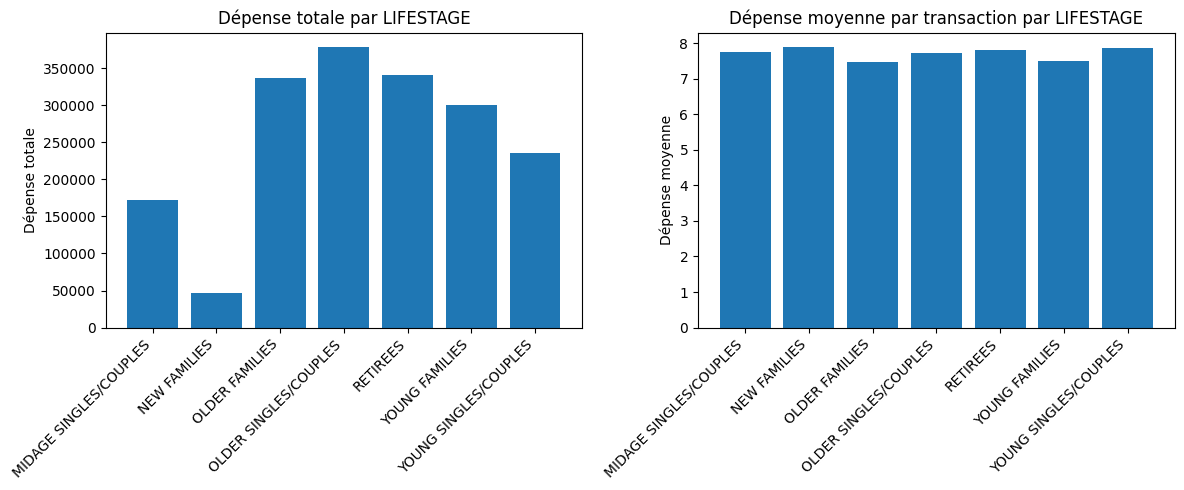

In [47]:
# Analyse de la dépense totale et moyenne par segment LIFESTAGE

# Dépense totale par LIFESTAGE
depense_totale_lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
depense_totale_lifestage.rename(columns={'TOT_SALES': 'DEPENSE_TOTALE'}, inplace=True)
print("Dépense totale par LIFESTAGE :")
print(depense_totale_lifestage)

# Dépense moyenne par transaction pour chaque LIFESTAGE
depense_moyenne_lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].mean().reset_index()
depense_moyenne_lifestage.rename(columns={'TOT_SALES': 'DEPENSE_MOYENNE'}, inplace=True)
print("\nDépense moyenne par transaction par LIFESTAGE :")
print(depense_moyenne_lifestage)

# Visualisation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(depense_totale_lifestage['LIFESTAGE'], depense_totale_lifestage['DEPENSE_TOTALE'])
plt.title('Dépense totale par LIFESTAGE')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Dépense totale')

plt.subplot(1, 2, 2)
plt.bar(depense_moyenne_lifestage['LIFESTAGE'], depense_moyenne_lifestage['DEPENSE_MOYENNE'])
plt.title('Dépense moyenne par transaction par LIFESTAGE')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Dépense moyenne')

plt.tight_layout()
plt.show()

Nombre de clients par catégorie PREMIUM_CUSTOMER :
Mainstream    90550
Budget        83342
Premium       62112
Name: PREMIUM_CUSTOMER, dtype: int64


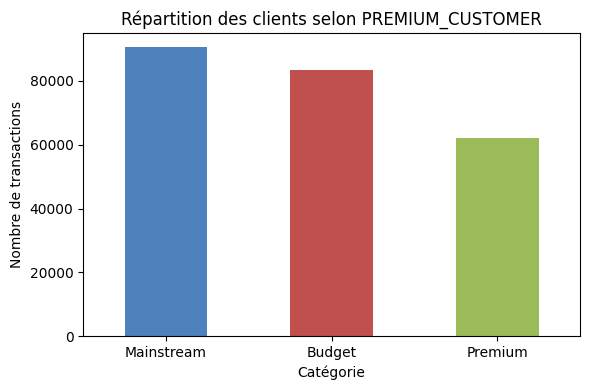

In [48]:
# Analyse de la répartition des clients selon le statut PREMIUM_CUSTOMER

# Comptage du nombre de clients par catégorie PREMIUM_CUSTOMER
premium_counts = df['PREMIUM_CUSTOMER'].value_counts()
print("Nombre de clients par catégorie PREMIUM_CUSTOMER :")
print(premium_counts)

# Visualisation de la répartition
plt.figure(figsize=(6, 4))
premium_counts.plot(kind='bar', color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.title("Répartition des clients selon PREMIUM_CUSTOMER")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Analyse des segments clients

Cette section analyse les segments clients définis par les variables **LIFESTAGE** et **PREMIUM_CUSTOMER**.

**Indicateurs analysés :**
- Total des ventes par segment
- Nombre de clients par segment
- Quantité moyenne de chips achetée par client
- Prix moyen par unité par segment

**Résultats principaux :**
- Les ventes les plus élevées proviennent de :
    - Budget – Older Families
    - Mainstream – Young Singles/Couples
    - Mainstream – Retirees
- Les jeunes couples mainstream sont nombreux et dépensent plus par unité.
- Le prix moyen par unité est significativement plus élevé pour les segments Mainstream jeunes et midage que pour Budget ou Premium, ce qui suggère des comportements d’achat impulsifs.

In [49]:
# Total des ventes par segment
ventes_par_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
ventes_par_segment = ventes_par_segment.sort_values('TOT_SALES', ascending=False)
ventes_par_segment.head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,160819.9
13,RETIREES,Mainstream,144849.6
19,YOUNG SINGLES/COUPLES,Mainstream,143754.2
15,YOUNG FAMILIES,Budget,132724.6
9,OLDER SINGLES/COUPLES,Budget,128810.6
10,OLDER SINGLES/COUPLES,Mainstream,125452.2
11,OLDER SINGLES/COUPLES,Premium,124497.0
12,RETIREES,Budget,105358.9
7,OLDER FAMILIES,Mainstream,98846.5
14,RETIREES,Premium,91178.8


In [50]:
# Nombre de clients par segment
clients_par_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
clients_par_segment.rename(columns={'LYLTY_CARD_NBR': 'NB_CLIENTS'}, inplace=True)
clients_par_segment = clients_par_segment.sort_values('NB_CLIENTS', ascending=False)
clients_par_segment.head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,NB_CLIENTS
19,YOUNG SINGLES/COUPLES,Mainstream,6822
13,RETIREES,Mainstream,5576
9,OLDER SINGLES/COUPLES,Budget,4397
10,OLDER SINGLES/COUPLES,Mainstream,4332
11,OLDER SINGLES/COUPLES,Premium,4227
6,OLDER FAMILIES,Budget,4200
12,RETIREES,Budget,3865
15,YOUNG FAMILIES,Budget,3587
14,RETIREES,Premium,3419
1,MIDAGE SINGLES/COUPLES,Mainstream,2959


In [51]:
# Quantité moyenne de chips achetée par client et par segment
quantite_par_client_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR'])['PROD_QTY'].sum().reset_index()
quantite_moyenne_segment = quantite_par_client_segment.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
quantite_moyenne_segment.rename(columns={'PROD_QTY': 'QTE_MOYENNE_PAR_CLIENT'}, inplace=True)
quantite_moyenne_segment = quantite_moyenne_segment.sort_values('QTE_MOYENNE_PAR_CLIENT', ascending=False)
quantite_moyenne_segment.head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,QTE_MOYENNE_PAR_CLIENT
7,OLDER FAMILIES,Mainstream,10.422956
6,OLDER FAMILIES,Budget,10.241905
8,OLDER FAMILIES,Premium,10.149780
17,YOUNG FAMILIES,Premium,9.918919
15,YOUNG FAMILIES,Budget,9.844438
16,YOUNG FAMILIES,Mainstream,9.829541
10,OLDER SINGLES/COUPLES,Mainstream,7.584488
11,OLDER SINGLES/COUPLES,Premium,7.555713
9,OLDER SINGLES/COUPLES,Budget,7.536047
1,MIDAGE SINGLES/COUPLES,Mainstream,7.205137


In [52]:
# Prix moyen par unité par segment
prix_moyen_unite_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).reset_index(name='PRIX_MOYEN_PAR_UNITE')
prix_moyen_unite_segment = prix_moyen_unite_segment.sort_values('PRIX_MOYEN_PAR_UNITE', ascending=False)
prix_moyen_unite_segment.head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,PRIX_MOYEN_PAR_UNITE
19,YOUNG SINGLES/COUPLES,Mainstream,4.090434
1,MIDAGE SINGLES/COUPLES,Mainstream,3.999029
4,NEW FAMILIES,Mainstream,3.966743
3,NEW FAMILIES,Budget,3.957773
12,RETIREES,Budget,3.941892
14,RETIREES,Premium,3.928427
5,NEW FAMILIES,Premium,3.899559
11,OLDER SINGLES/COUPLES,Premium,3.898084
9,OLDER SINGLES/COUPLES,Budget,3.887331
13,RETIREES,Mainstream,3.856691


## Visualisations des indicateurs par segment

Les graphiques suivants illustrent les principaux indicateurs analysés pour chaque segment (LIFESTAGE, PREMIUM_CUSTOMER) :
- Total des ventes
- Nombre de clients
- Quantité moyenne de chips achetée par client
- Prix moyen par unité

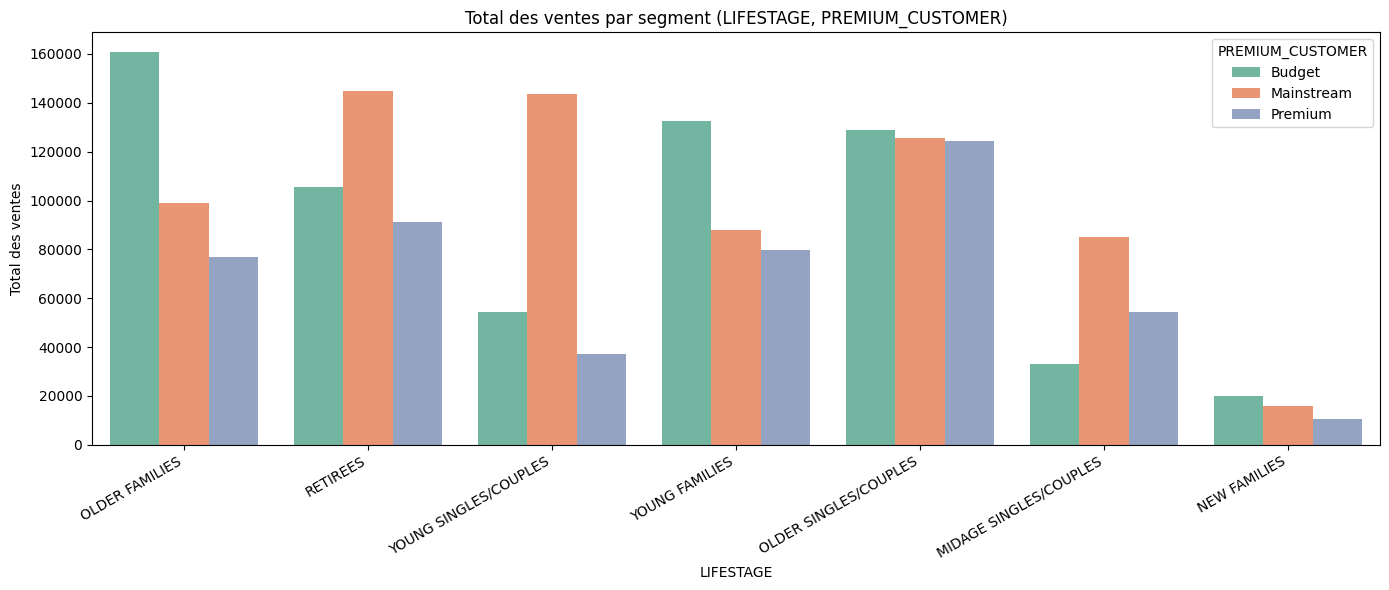

In [53]:
# Visualisation du total des ventes par segment
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(
    data=ventes_par_segment,
    x='LIFESTAGE',
    y='TOT_SALES',
    hue='PREMIUM_CUSTOMER',
    palette='Set2'
)
plt.title('Total des ventes par segment (LIFESTAGE, PREMIUM_CUSTOMER)')
plt.ylabel('Total des ventes')
plt.xlabel('LIFESTAGE')
plt.xticks(rotation=30, ha='right')
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

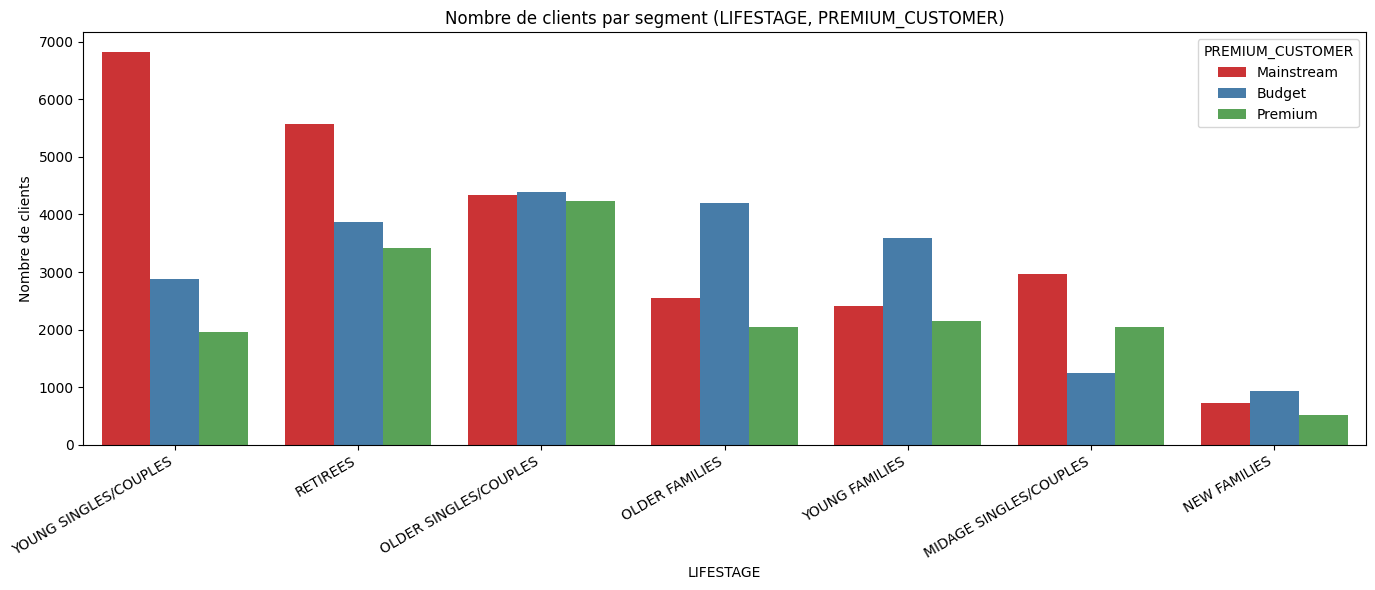

In [54]:
# Visualisation du nombre de clients par segment
plt.figure(figsize=(14, 6))
sns.barplot(
    data=clients_par_segment,
    x='LIFESTAGE',
    y='NB_CLIENTS',
    hue='PREMIUM_CUSTOMER',
    palette='Set1'
)
plt.title('Nombre de clients par segment (LIFESTAGE, PREMIUM_CUSTOMER)')
plt.ylabel('Nombre de clients')
plt.xlabel('LIFESTAGE')
plt.xticks(rotation=30, ha='right')
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

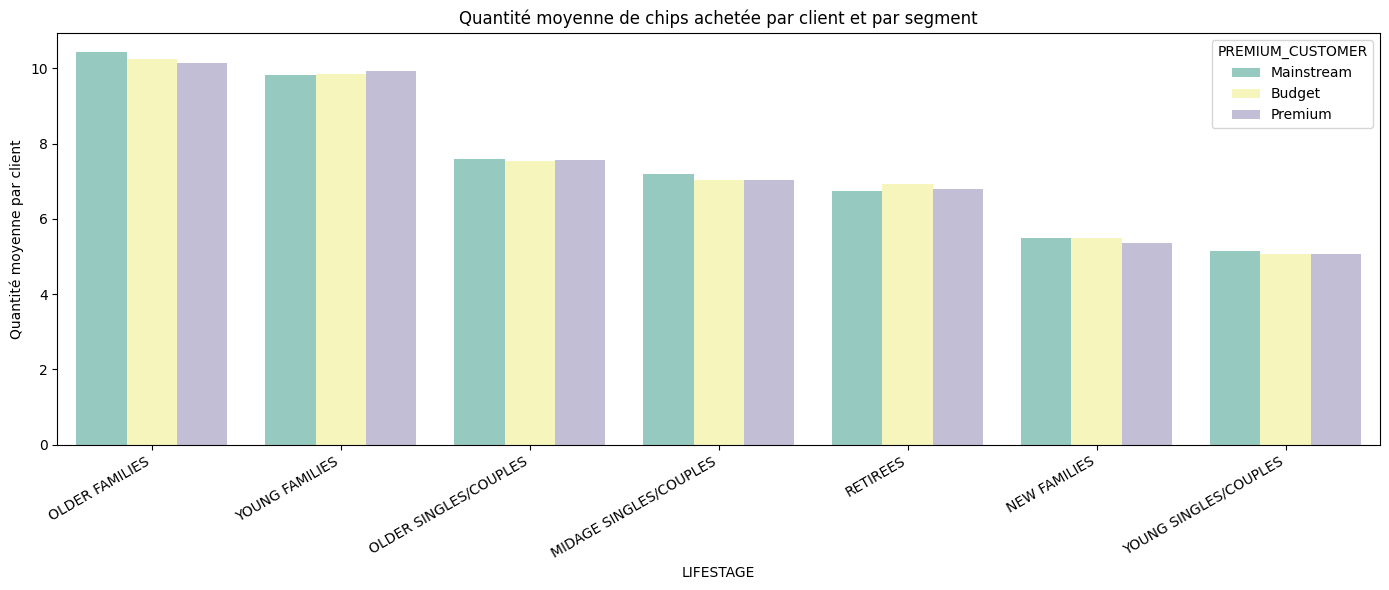

In [55]:
# Visualisation de la quantité moyenne de chips achetée par client et par segment
plt.figure(figsize=(14, 6))
sns.barplot(
    data=quantite_moyenne_segment,
    x='LIFESTAGE',
    y='QTE_MOYENNE_PAR_CLIENT',
    hue='PREMIUM_CUSTOMER',
    palette='Set3'
)
plt.title('Quantité moyenne de chips achetée par client et par segment')
plt.ylabel('Quantité moyenne par client')
plt.xlabel('LIFESTAGE')
plt.xticks(rotation=30, ha='right')
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

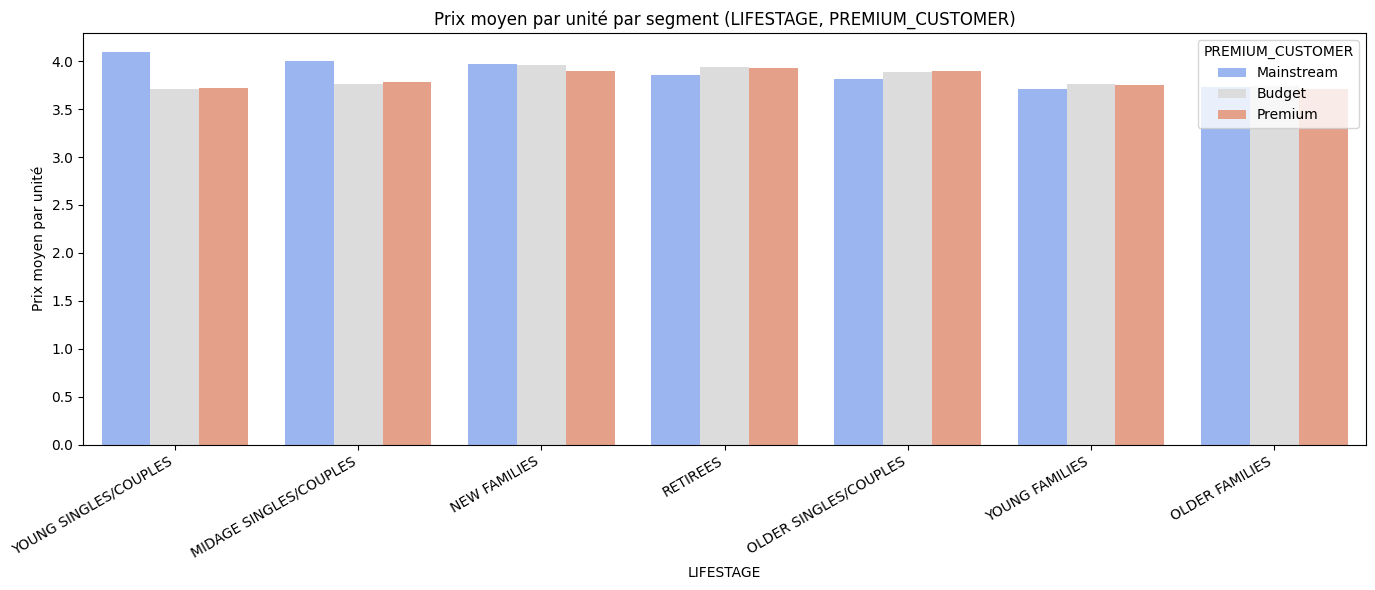

In [56]:
# Visualisation du prix moyen par unité par segment
plt.figure(figsize=(14, 6))
sns.barplot(
    data=prix_moyen_unite_segment,
    x='LIFESTAGE',
    y='PRIX_MOYEN_PAR_UNITE',
    hue='PREMIUM_CUSTOMER',
    palette='coolwarm'
)
plt.title('Prix moyen par unité par segment (LIFESTAGE, PREMIUM_CUSTOMER)')
plt.ylabel('Prix moyen par unité')
plt.xlabel('LIFESTAGE')
plt.xticks(rotation=30, ha='right')
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

# Deep dive : Mainstream Young Singles/Couples

Analyse détaillée du segment **Mainstream Young Singles/Couples** :
- Affinité à certaines marques (Tyrrells, Burger Rings)
- Préférence pour certains pack sizes (notamment 270g)

Nous allons comparer la propension de ce segment à acheter ces marques et tailles par rapport au reste des clients.

In [57]:
# Filtrer le segment cible
segment = df[(df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]
reste = df[~((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Affinité à la marque Tyrrells
part_tyrrells_segment = segment['BRAND'].value_counts(normalize=True).get('Tyrrells', 0)
part_tyrrells_reste = reste['BRAND'].value_counts(normalize=True).get('Tyrrells', 0)
variation_tyrrells = (part_tyrrells_segment - part_tyrrells_reste) / part_tyrrells_reste * 100 if part_tyrrells_reste > 0 else None

# Affinité à la marque Burger Rings
part_burgerrings_segment = segment['BRAND'].value_counts(normalize=True).get('Burger', 0)
part_burgerrings_reste = reste['BRAND'].value_counts(normalize=True).get('Burger', 0)
variation_burgerrings = (part_burgerrings_segment - part_burgerrings_reste) / part_burgerrings_reste * 100 if part_burgerrings_reste > 0 else None

# Préférence pour le pack size 270g
part_270g_segment = segment['PACK_SIZE'].value_counts(normalize=True).get(270, 0)
part_270g_reste = reste['PACK_SIZE'].value_counts(normalize=True).get(270, 0)
variation_270g = (part_270g_segment - part_270g_reste) / part_270g_reste * 100 if part_270g_reste > 0 else None

print(f"Tyrrells : {variation_tyrrells:+.0f}% de différence dans le segment vs reste")
print(f"Burger Rings : {variation_burgerrings:+.0f}% de différence dans le segment vs reste")
print(f"Pack 270g : {variation_270g:+.0f}% de différence dans le segment vs reste")

Tyrrells : +23% de différence dans le segment vs reste
Burger Rings : -59% de différence dans le segment vs reste
Pack 270g : +28% de différence dans le segment vs reste


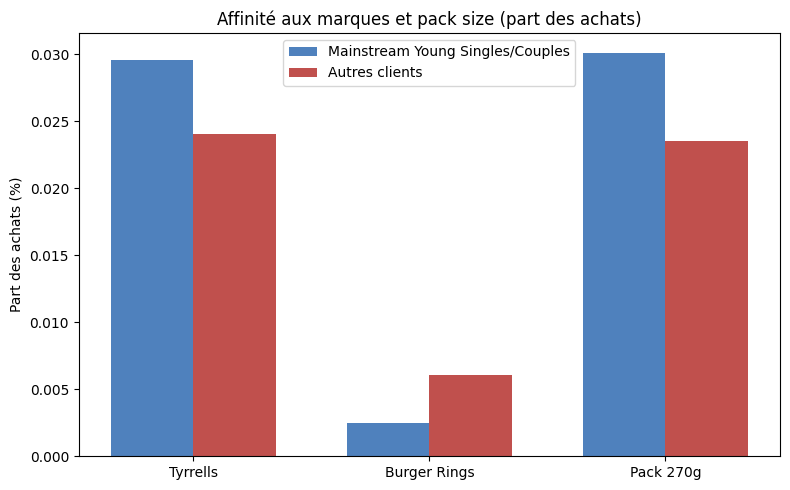

In [58]:
# Visualisation des différences d'affinité
labels = ['Tyrrells', 'Burger Rings', 'Pack 270g']
segment_vals = [part_tyrrells_segment, part_burgerrings_segment, part_270g_segment]
reste_vals = [part_tyrrells_reste, part_burgerrings_reste, part_270g_reste]

x = range(len(labels))
plt.figure(figsize=(8, 5))
plt.bar(x, segment_vals, width=0.35, label='Mainstream Young Singles/Couples', color='#4F81BD')
plt.bar([i + 0.35 for i in x], reste_vals, width=0.35, label='Autres clients', color='#C0504D')
plt.xticks([i + 0.175 for i in x], labels)
plt.ylabel('Part des achats (%)')
plt.title("Affinité aux marques et pack size (part des achats)")
plt.legend()
plt.tight_layout()
plt.show()

# Conclusions de l’analyse (avec références aux visualisations et données)

Voici les principaux enseignements tirés de l’ensemble des analyses, avec les visualisations ou tableaux correspondants :

**1. Segmentation et comportements clients**
- Les segments les plus rentables sont : Budget – Older Families, Mainstream – Young Singles/Couples, Mainstream – Retirees.
    - *Voir le graphique « Total des ventes par segment » (Cellule 1 des visualisations)*
- Les jeunes couples mainstream sont nombreux et dépensent plus par unité.
    - *Voir « Nombre de clients par segment » et « Prix moyen par unité par segment » (Cellules 2 et 4 des visualisations)*

**2. Dépenses et quantités**
- Les clients les plus dépensiers ne sont pas forcément ceux qui achètent le plus de paquets, mais ceux qui achètent des produits plus chers ou en plus grande quantité par transaction.
    - *Voir « Dépense totale par client » et « Quantité totale achetée par client » (Cellules 1 et 4 des analyses clients)*
- Les tailles de paquets préférées varient selon les segments, avec une préférence marquée pour le 270g chez les jeunes couples mainstream.
    - *Voir l’analyse deep dive et la visualisation d’affinité (fin du notebook)*

**3. Affinité aux marques**
- Le segment Mainstream Young Singles/Couples est particulièrement attiré par la marque Tyrrells (+23% par rapport au reste), et moins par Burger Rings (-56%).
    - *Voir la visualisation « Affinité aux marques et pack size » (fin du notebook)*
- Ce même segment est aussi plus enclin à acheter des paquets de 270g (+27%).
    - *Voir la même visualisation d’affinité (fin du notebook)*

**4. Prix moyen par unité**
- Le prix moyen par unité est significativement plus élevé pour les segments Mainstream jeunes et midage que pour Budget ou Premium.
    - *Voir « Prix moyen par unité par segment » (Cellule 4 des visualisations)*

**5. Recommandations**
- Cibler les segments Mainstream Young Singles/Couples et Older Families avec des offres spécifiques (packs 270g, marques premium).
- Adapter la communication et les promotions selon les préférences de chaque segment pour maximiser la valeur client.
    - *Ces recommandations sont issues de l’ensemble des visualisations et analyses précédentes.*

**En résumé :**
L’analyse met en évidence l’importance de la segmentation pour comprendre les comportements d’achat et optimiser les stratégies marketing. Les différences d’affinité aux marques, de taille de paquet et de prix moyen par segment offrent des leviers d’action concrets pour augmenter les ventes et la satisfaction client.